In [14]:
# Seasonality Analysis:
# The oil production in the Greater Ekofisk Area exhibits clear seasonal fluctuations.
# The data shows a recurring pattern with peaks and declines approximately every 12 months.
# This is likely due to operational factors such as maintenance schedules, weather conditions,
# and regulatory constraints. The Holt-Winters model was chosen for forecasting as it 
# captures both trend and seasonality effectively.
# See the sources in the txt file named 'Analysis_Synthesis_Forecasting_sources.txt'

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
file_path = r'C:\Users\USUARIO\Desktop\greater_ekofisk_area_production.csv'
df = pd.read_csv(file_path, parse_dates=['date'])

# Prepare time series data
df = df.sort_values('date')
df = df.set_index('date')
df.index.freq = 'MS'

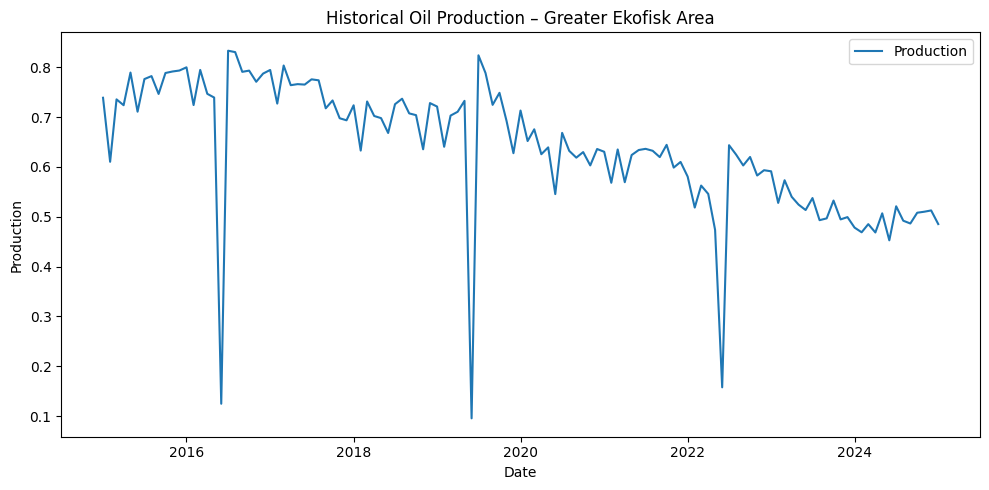

In [16]:
# Visualize historical production 
plt.figure(figsize=(10, 5))
plt.plot(df['production'], label='Production')
if 'production_ma' in df.columns:
    plt.plot(df['production_ma'], label='Moving Average', linestyle='--')
plt.title('Historical Oil Production – Greater Ekofisk Area')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Forecast using Holt-Winters (12-month seasonality)
model = ExponentialSmoothing(df['production'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

In [18]:
# Create forecast for 24 months (2026–2027)
forecast_periods = 24
future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='MS')
forecast_values = fit.forecast(forecast_periods)

df_forecast = pd.DataFrame({
    'project': 'Ekofisk',
    'date': future_index,
    'production': forecast_values.values
})

In [19]:
# Combine historical and forecast
df_hist = df.reset_index()[['date', 'production']]
df_hist['project'] = 'Ekofisk'
final_df = pd.concat([df_hist[['project', 'date', 'production']], df_forecast], ignore_index=True)

In [23]:
# Export final output
output_path = r'C:\Users\USUARIO\Desktop\analysis_synthesis_forecasting.csv'
final_df.to_csv(output_path, index=False)
print(f"File saved at: {output_path}")

File saved at: C:\Users\USUARIO\Desktop\analysis_synthesis_forecasting.csv
